In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
segment = gpd.read_file('segments_geometry.geojson')
segment.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   segment_id  792 non-null    object  
 1   road_name   792 non-null    object  
 2   geometry    792 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 18.7+ KB


In [3]:
invalid_geom = segment[~segment.geometry.is_valid]
nan_geom = segment[segment.geometry.isna()]

print("Invalid Geometries:", len(invalid_geom))
print("NaN Geometries:", len(nan_geom))


Invalid Geometries: 0
NaN Geometries: 0


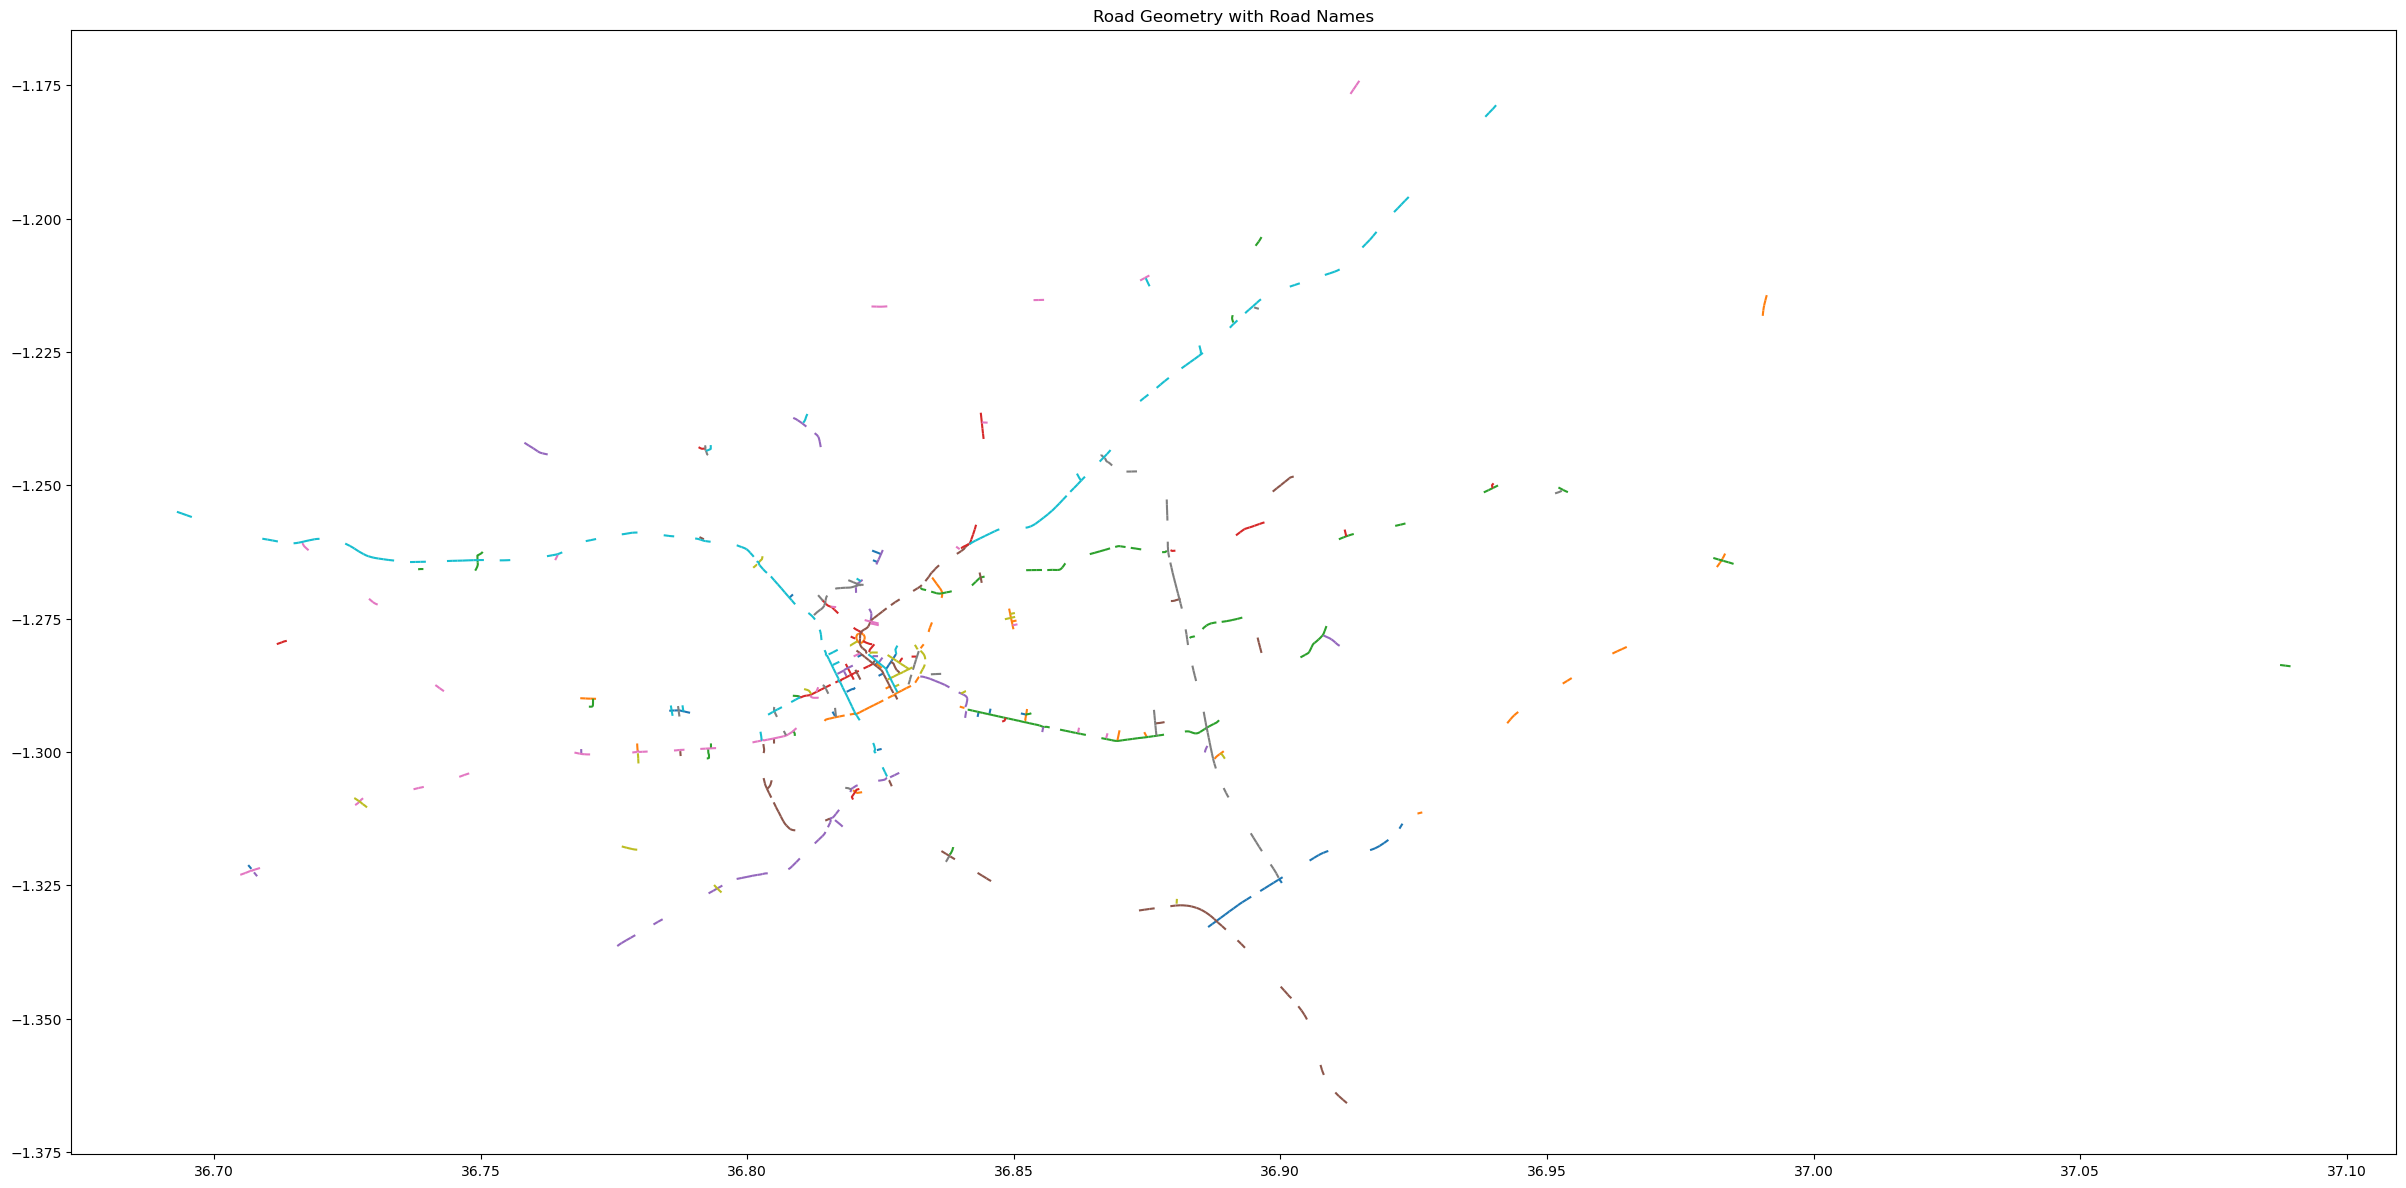

In [11]:
fig, ax = plt.subplots(figsize=(30,30))
segment.plot(column='road_name', legend=False, ax=ax)
plt.title("Road Geometry with Road Names")
plt.show()

In [12]:
train_data = pd.read_csv('Train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        6318 non-null   int64  
 1   datetime   6318 non-null   object 
 2   latitude   6318 non-null   float64
 3   longitude  6318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 197.6+ KB


In [13]:
weather_info = pd.read_csv('Weather_Nairobi_Daily_GFS.csv')
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  731 non-null    object 
 1   precipitable_water_entire_atmosphere  728 non-null    float64
 2   relative_humidity_2m_above_ground     728 non-null    float64
 3   specific_humidity_2m_above_ground     728 non-null    float64
 4   temperature_2m_above_ground           728 non-null    float64
 5   u_component_of_wind_10m_above_ground  728 non-null    float64
 6   v_component_of_wind_10m_above_ground  728 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.1+ KB


In [14]:
segment_info = pd.read_csv('Segment_info.csv')
segment_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Columns: 228 entries, segment_id to 80_97_61_39_16
dtypes: float64(27), int64(200), object(1)
memory usage: 2.7+ MB


In [15]:
segment_info.columns

Index(['segment_id', 'side', '25_48', '79_76', '79_65', '79_39', '28_78_50',
       '55_90', '26_76', '92_30',
       ...
       '80_97_61_65_11', '80_97_61_65_12', '80_97_61_65_15', '80_97_61_65_16',
       '80_97_61_39_0', '80_97_61_39_10', '80_97_61_39_11', '80_97_61_39_12',
       '80_97_61_39_15', '80_97_61_39_16'],
      dtype='object', length=228)

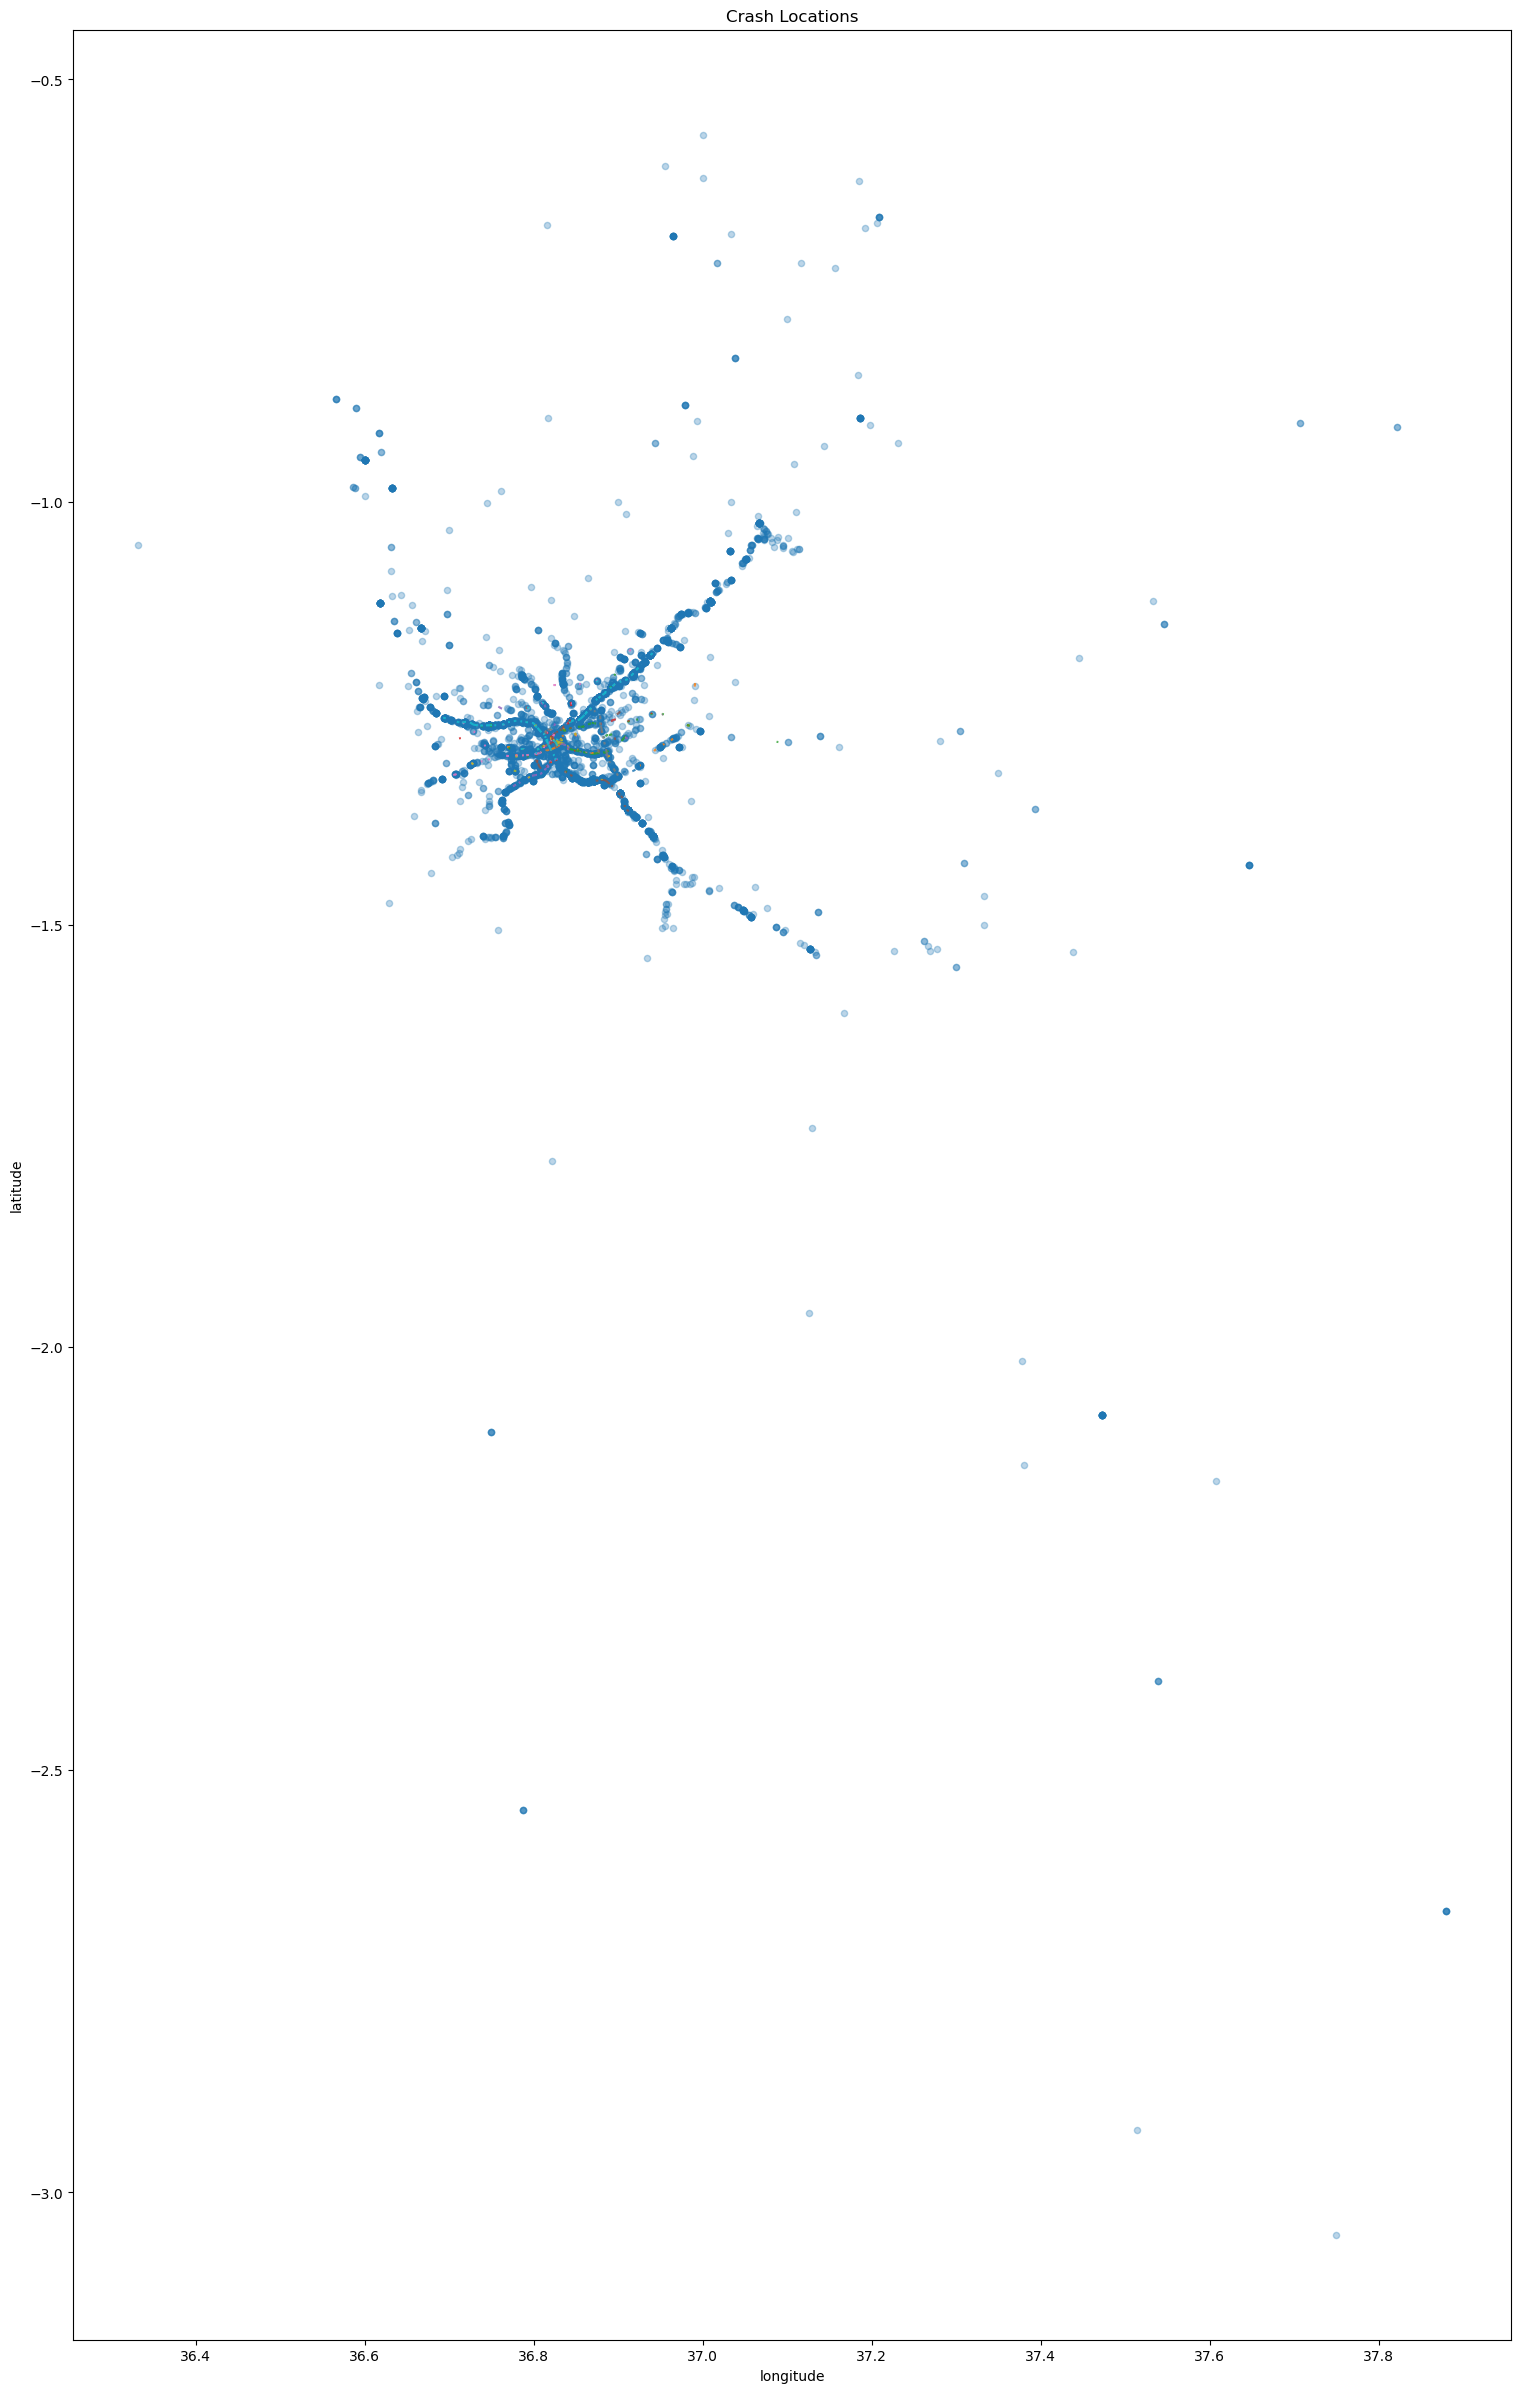

In [17]:
ax = segment.plot(column='road_name',legend=False,figsize=(30,30))
train_data.plot(x='longitude', y='latitude', kind='scatter',alpha = 0.3, title='Crash Locations',ax = ax)
plt.show()

In [18]:
weather_info.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,23.977231,83.160478,0.010955,15.175692,-1.907236,-1.128133
std,4.693146,9.084966,0.001326,1.127291,1.250924,1.118509
min,10.800000,42.200001,0.006380,11.749994,-5.880168,-3.796548
25%,20.700001,79.887714,0.010057,14.430894,-2.736363,-1.978961
50%,24.024831,85.626667,0.011251,15.231058,-1.953043,-1.084154
75%,27.500000,89.599998,0.011940,15.916383,-1.167893,-0.274010
max,34.000000,95.769302,0.013284,19.928125,3.478000,1.973149


In [19]:
segment

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [20]:
segment.to_crs('epsg:4326')

,segment_id,road_name,geometry
0,28_1,accra road-tertiary,"LINESTRING (36.82603 -1.28447, 36.82605 -1.284..."
1,137_1,accra road-tertiary,"LINESTRING (36.82656 -1.28371, 36.82658 -1.283..."
2,137_2,accra road-tertiary,"LINESTRING (36.82711 -1.28289, 36.82713 -1.282..."
3,1_1,airport north road-primary,"LINESTRING (36.88646 -1.33284, 36.88649 -1.332..."
4,1_2,airport north road-primary,"LINESTRING (36.88726 -1.33226, 36.88729 -1.332..."
...,...,...,...
787,243_8,thika road-primary,"LINESTRING (36.84285 -1.26037, 36.84281 -1.260..."
788,271_1,waiyaki way-trunk,"LINESTRING (36.72987 -1.26356, 36.72991 -1.263..."
789,271_2,waiyaki way-trunk,"LINESTRING (36.73084 -1.26374, 36.73089 -1.263..."
790,271_3,waiyaki way-trunk,"LINESTRING (36.73182 -1.26388, 36.73187 -1.263..."


In [21]:
train_data

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382
...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518


In [22]:
training_data = train_data.drop(columns=['uid','datetime'])

In [23]:
from sklearn.model_selection import train_test_split
X_train ,X_Test = train_test_split(training_data,test_size=0.2,random_state=42)

Use Agglomerative clustering to model the data

In [24]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2,activation='linear')  # Output layer with 2 units for latitude and longitude
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the neural network
model.fit(X_train,X_train, epochs=200, batch_size=25,verbose=0)

# Extract features from intermediate layers
intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                          outputs=model.layers[5].output)
features = intermediate_layer_model.predict(X_train)
features

2023-12-23 10:51:31.668131: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-23 10:51:41.236097: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


158/158 [==============================] - 1s 5ms/step


array([[-1.2539814, 36.81658  ],
       [-0.941298 , 36.623283 ],
       [-1.2451732, 36.878525 ],
       ...,
       [-1.25401  , 36.812798 ],
       [-1.2697874, 36.86546  ],
       [-1.2537056, 36.81604  ]], dtype=float32)

In [73]:
from sklearn.cluster import AgglomerativeClustering
# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=None,distance_threshold=0.75, metric='euclidean')
clusters = cluster.fit(features)
clusters = clusters.fit_predict(features)

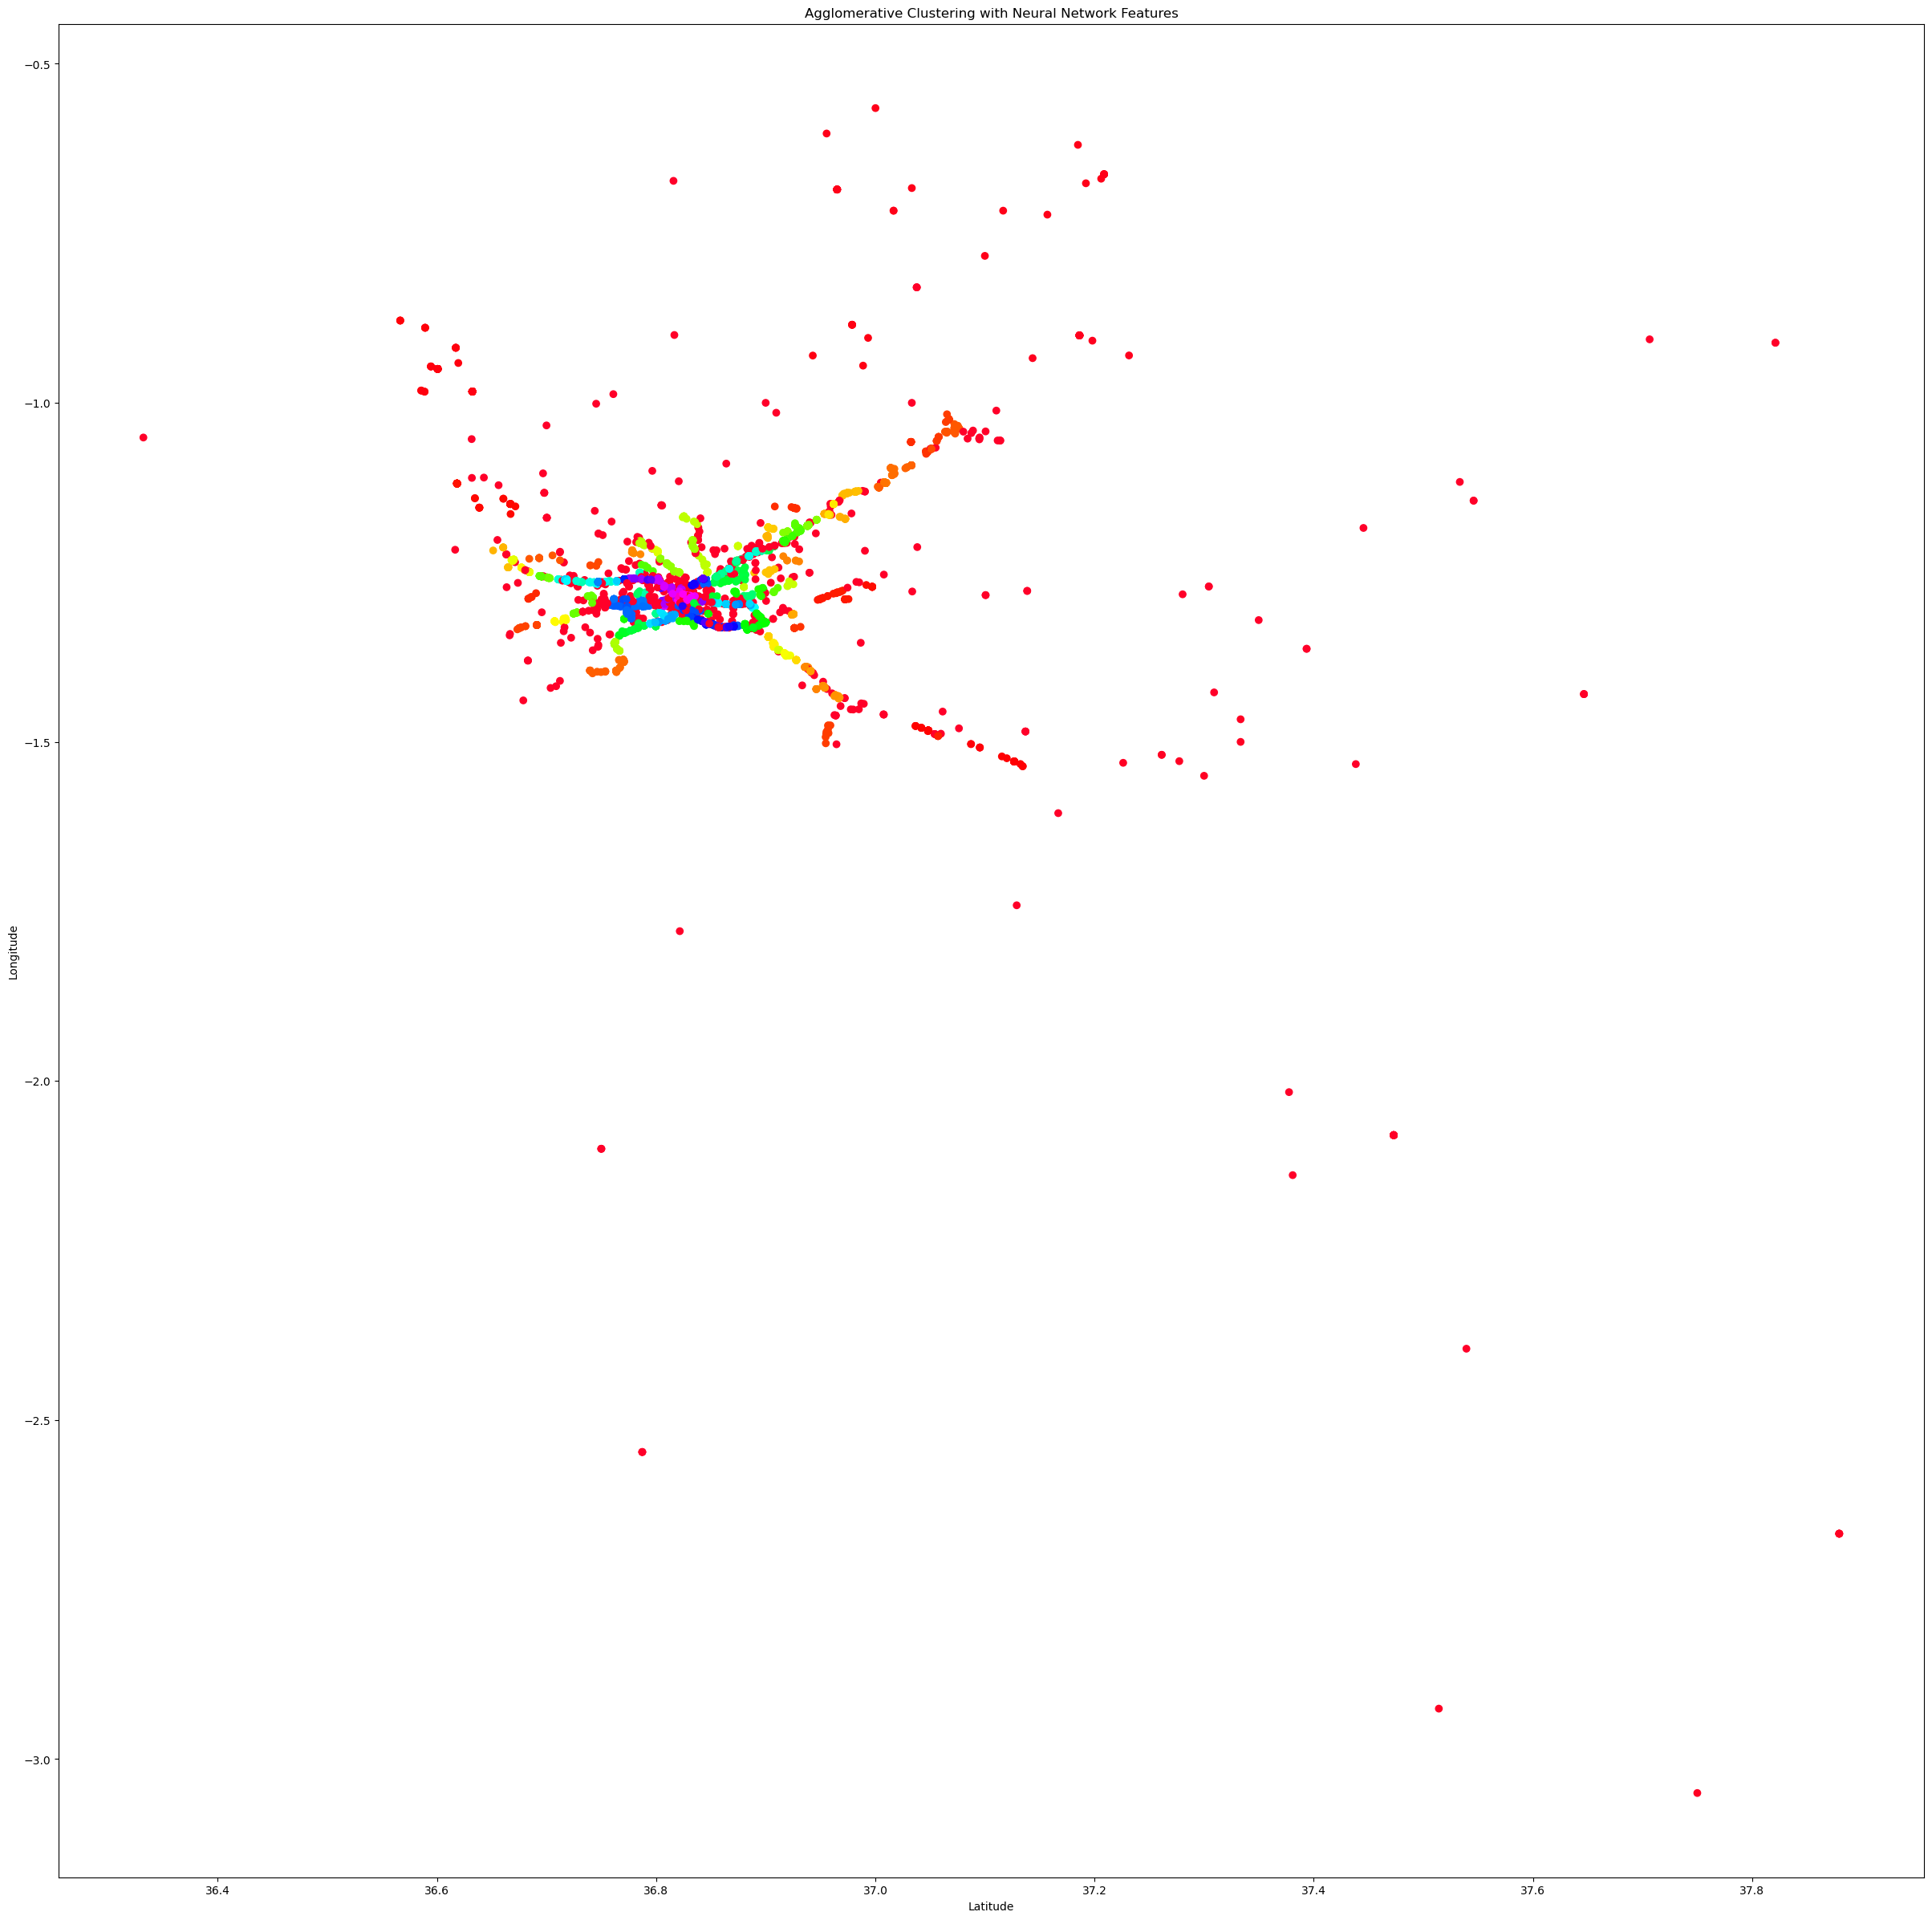

In [72]:
plt.figure(figsize=(30,30))
plt.scatter(X_train['longitude'], X_train['latitude'], c=clusters, cmap='gist_rainbow')
plt.title('Agglomerative Clustering with Neural Network Features')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def predict_clusters(cluster_pred, new_data):

    assigned_clusters = cluster_pred.fit_predict(new_data)

    return assigned_clusters

new_data = pd.DataFrame({'latitude':[-1.230255],
                         'longitude':[36.841331]})
# Make predictions on new data
predicted_clusters = predict_clusters(cluster,new_data)

# Print the predicted clusters
predicted_clusters


ValueError: Found array with 1 sample(s) (shape=(1, 2)) while a minimum of 2 is required by AgglomerativeClustering.

In [41]:
new_data.shape ,X_Test.shape

((2, 2), (1264, 2))

In [44]:
X_Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 4082 to 4685
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1264 non-null   float64
 1   longitude  1264 non-null   float64
dtypes: float64(2)
memory usage: 29.6 KB


In [ ]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
silhouette_score = silhouette_score(X_train,clusters)
print(f"Silhouette score: {silhouette_score}")
calinski_harabasz_score = calinski_harabasz_score(X_train,clusters)
print(f"calinski harabasz score: {calinski_harabasz_score}")
davies_bouldin_score = davies_bouldin_score(X_train,clusters)
print(f"davies bouldin score: {davies_bouldin_score}")

In [ ]:
from scipy.spatial import ConvexHull
# Visualize the hierarchical clusters with scatter plot and convex hulls
plt.figure(figsize=(30, 30))

for cluster_label in set(clusters):
    cluster_points = X_train.loc[clusters == cluster_label]
    plt.scatter(
        cluster_points['longitude'],
        cluster_points['latitude'],
        label=f'Cluster {cluster_label + 1}',
        alpha=0.7,
        s=100  # Adjust the point size here
    )

    # Outline clusters with convex hulls
    hull = ConvexHull(cluster_points[['longitude', 'latitude']])
    for simplex in hull.simplices:
        plt.plot(cluster_points['longitude'].values[simplex], cluster_points['latitude'].values[simplex], 'k-', linewidth=2)

plt.title('Agglomerative Clustering with Neural Network Features')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



In [ ]:
cluster.get_params()

In [ ]:
model.save('/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/assets.h5')

In [ ]:
import joblib
joblib.dump(cluster,'/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/agg_model.pkl')

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("/home/roy/Documents/Final_Project/NaiRERS/nairers-ml/assets")

In [75]:
cluster.children_

array([[    0,   963],
       [    1,   114],
       [    2,   108],
       ...,
       [10102, 10103],
       [10100, 10104],
       [10097, 10105]])